# Advanced Topics II: Complexity 

**Monday: Generators and Iterators**

In previous sections of this book, you may have seen the words generators or iterators
mentioned. Without knowing, you’ve been using them the entire time.

**Iterators vs. Iterables**

An **iterator** is an object that contains items which can be iterated upon, meaning
you can traverse through all values. An **iterable** is a collection like lists, dictionaries,
tuples, and sets. The major difference is that iterables are not iterators; rather they are
containers for data. In Python, iterator objects implement the magic methods iter and
next that allow you to traverse through its values.

In [1]:
# creating a basic iterator from an iterable
sports = [ "baseball", "soccer", "football", "hockey", "basketball" ]
my_iter = iter(sports)
print(next(my_iter)) # outputs firs item
print(next(my_iter)) # outputs second item
for item in my_iter: # this is ine 10
    print(item)
print(next(my_iter))

baseball
soccer
football
hockey
basketball


StopIteration: 

**Note :** Iterators will always remember the last item that they
returned, which is why we get an error on line 13. Using the next() method, we’re able
to output the next item within the iterator. Once all the items within the iterator have
been used, however, we can no longer traverse through the iterator, as there are no
more items left. Iterators are great for looping as well, and like lists and dictionaries,
we can simply use the in keyword (see line 10). You can still loop over the list like we
normally do, and it will always begin from index 0, but once our iterator is out of items,
we can no longer use it.

**Creating Our Own Iterator**

To create an iterator, we’ll need
to implement the magic methods __iter__() and __next__():

In [1]:
# creating our own iterator
class Alphabet():
    def __iter__(self):
        self.letters = "abcdefghijklmnopqrstuvwxyz"
        self.index = 0
        return self
    def __next__(self):
        if self.index <= 25:
            char = self.letters[self.index]
            self.index += 1
            return char
        else:
            raise StopIteration
for char in Alphabet():
    print(char)

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


**Note :** Iterators are useful when you’re in need of traversing through Python collections
in a specific way.

**What Are Generators?**

Generators are functions that yield back information to produce a sequence of results rather than a single value. They’re a way to simplify the creation of an iterator. Normally, when a function has completed its task and returned information, the variables declared inside of the function will be deleted. With generators, however, they use the “yield” keyword to send information back to the location it was called without terminating the function. Generators don’t always have to yield back integers though you can yield any information you’d like.   
**Note :** Generators are simplified iterators.

**Creating a Range Generator**

lthough the range function is not a generator, we can make our own version that’s
created from a generator using the yield keyword.

In [3]:
# creating our own range generator with start, stop, and step parameters
def myRange(stop, start = 0, step = 1):
    while start < stop:
        print("Geerator Start Value: {}".format(start))
        yield start
        start += step # increment start, otherwise infinite loop
for x in myRange(5):
    print("For Loop X Value: {}".format(x))

Geerator Start Value: 0
For Loop X Value: 0
Geerator Start Value: 1
For Loop X Value: 1
Geerator Start Value: 2
For Loop X Value: 2
Geerator Start Value: 3
For Loop X Value: 3
Geerator Start Value: 4
For Loop X Value: 4


### MONDAY EXERCISES

In [16]:
liste = [ 1, 2, 3, 4, 5 ]
class RevIter():
    def __init__(self, liste):
        self.liste = liste
        self.index = -1
    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= -len(liste):
            item = self.liste[self.index]
            self.index -= 1
            return item
        else:
            raise StopIteration

for item in RevIter(liste):
    print(item)

5
4
3
2
1


In [1]:
def squared(num):
    for i in range(num+1):
        yield i**2
for i in squared(4):
    print(i)

0
1
4
9
16


# Tuesday: Decorators

**What Are Decorators?**
**Decorators**, also known as wrappers, are functions that give other functions extra
capabilities without explicitly modifying them. They are denoted by the “@” symbol
in front of the function name, which is written above a function declaration like the
following:
<p><b>
>>> @decorator  <br>
>>> def normalFunc( ): <br>
    </b></p>

Decorators are useful when you want to perform some functionality before or
after a function executes. For example, let’s imagine you wanted to restrict access to
a function based on a user being logged in. Rather than writing the same conditional
statement for every function you create, you could put the code into a decorator
and apply the decorator onto all functions. Now, whenever a function is called, the
conditional statement will still run, but you were able to save yourself several lines.
This is a real-life example for the Flask framework, which restricts access to certain
pages based on user authentication using decorators. We’ll see a minimal example of
this later today.

**Higher-Order Functions**

A higher-order function is a function that operates on other functions, either by taking
a function as its argument or by returning a function. We saw this done in last week’s
lesson with lambdas, map, filter, and reduce. Decorators are higher-order functions
because they take in a function and return a function.

**Creating and Applying a Decorator**

We’ll need to declare a function that takes in another function as an argument in order
to create a decorator. Inside of this decorator, we can then define another function to be
returned that will run the function that was passed in as an argument. Let’s see how this
is written:

In [3]:
#creating and applying our own decorator using the @ symbol
def dectator(func):
    def wrap():
        print("=======")
        func()
        print("======")
    return wrap
@dectator
def printName():
    print("John!")
printName( )

John!


**Decorators with Parameters**:
Although decorators simply add extra capabilities to functions, they can also have
arguments like any other function. Let’s take the following example where we want to
run a function x times:

In [13]:
# creating a decorator that takes in parameters
def run_times(num):
    def wrap(func):
        for i in range(num):
            func()
    return wrap

@run_times(4)
def sayHello():
    print("Hello!")

Hello!
Hello!
Hello!
Hello!


**Note** When passing an argument into a decorator, the function is automatically
run, so we do not need to call sayHello in this instance.

**Functions with Decorators and Parameters**

When you need a function to accept arguments, while also having a decorator attached
to it, the wrap function must take in the same exact arguments as the original function.
Let’s try it:

In [14]:
#creating a dectator for a function that accepts parameters
def birthday(func):
    def wrap(name, age):
        func(name, age + 1)
    return wrap
#birthday
def celebrate(name, age):
    print( f"Happy birthday {name}, you are now {age }.")
celebrate("Paul", 43)

Happy birthday Paul, you are now 43.


**Restricting Function Access**
You’re probably wondering how decorators can serve a purpose, since the last few cells
seem meaningless. For each one of them, we could have simply added those lines within
the original function. That was just for syntax understanding though. Decorators are
used a lot with frameworks and help to add functionality to many functions that you’ll
write within them. One example is being able to restrict access of a page or function
based on user login credentials. Let’s create a decorator that will help to restrict access if
the password doesn’t match

In [28]:
# real world sim, restricting function access
def login_required(func):
    def wrap(user):
        password = input("What is the password?")
        if password == user["password"]:
            func(user)
        else:
            print("Access Denied")
    return wrap
@login_required
def restrictedFunc(user):
    print("Access granted, welcome {}".format(user["name"]))
user = { "name" : "Jess", "password" : "ilywpf" }
restrictedFunc(user)

What is the password?ilywpf
Access granted, welcome Jess


# TUESDAY EXERCISES

**1. User Input:** Create a decorator that will ask the user for a number, and run
the function it is attached to only if the number is less than 100. The function
should simply output “Less than 100”. Use the function declaration in the
following:


<p>
>>> @decorator <br>
>>> def numbers(): <br>
>>>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;print("Less than 100")
</p>

In [40]:
def decorator(func):
    def number():
        num = int(input("Please enter a number: "))
        if num < 100:
            func()
        else:
            print("Great !")
    return number

@decorator
def numbers():
    print("Less than 100")
numbers()

Please enter a number: 165
Great !


**Creating a Route:** Create a decorator that takes in a string as an argument with
a wrap function that takes in func. Have the wrap function print out the string,
and run the function passed in. The function passed in doesn’t need to do
anything. In Flask, you can create a page by using decorators that accept a URL
string. Use the function declaration in the following to start:
<p>>>> @route("/index") <br>
>>> def index( ): <br>
>>> print("This is how web pages are made in Flask") <br>
</p>

In [42]:
def route(*a):
    def wrap(func):
        print(*a)
        func()
    return wrap
        
@route("/index")
def index():
    print("This is how web pages are made in Flask")

/index
This is how web pages are made in Flask


**Today was an important lesson in preparation for other technologies that use
Python, such as frameworks. Decorators help to improve function execution and
can be attached to any function necessary. This helps to reduce code and give
improved functionality.**

# Wednesday: Modules

**Importing a Module**

For the next few examples, we’ll be working with the math module, which is one of
Python’s built-in modules. This specific module has functions and variables to help us
with any problem related to math, whether it’s rounding, calculating pi, or many other
math-related tasks. For this first cell, we’re going to import the entire math module and
its contents

In [44]:
# import the entire math module
import math 
print(math.floor(2.5)) # rounds down
print(math.ceil(2.5))  # rounds up
print(math.pi)

2
3
3.141592653589793


**Importing Only Variables and Functions**

In [48]:
# importing only variables and functions rather than an entire module, better efficiency

from math import floor, pi
print(floor(2.5))
#print(ceil(2.5))         #will cause error because we only imported floor and pi, not ceil and not all of math
print(pi)

2
3.141592653589793


**Note** You can import classes from modules the same way as earlier; simply use
the name of the class.

**Using an Alias**

In [49]:
# using the 'as' keyword to create an alias for imports
from math import floor as f
print( f(2.5) )

2


**Creating Our Own Module**

Now that we know how to import and call a module, let’s create our own. Go ahead
and open any text editor you have on your computer like Notepad or TextEdit. Write the
following code in cell in the file, and save it within the same folder that your “Week_09” file is
located, with the name “test.py”. If the two files aren’t in the same directory, it produces
an error: 


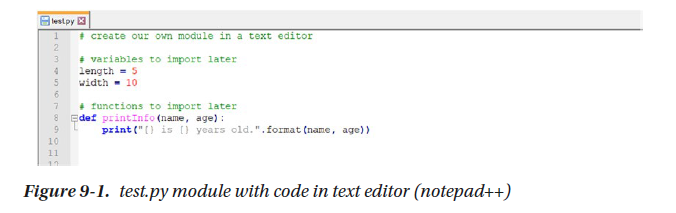

In [2]:
from IPython.display import Image
Image(filename='images_projects/test.png')

**Using Our Module in Jupyter Notebook**

In any other circumstance, you’d import the variables and function we wrote in test.py
with the import and from keywords. Jupyter Notebook, however, works a little differently
when using modules that you’ve created. We’ll use the “run” command in order to load
in the entire module that we’ve created. After we run the file, we can use the variables
and functions that we wrote within the module. Let’s check out how to do so:

In [52]:
# using the run command with Jupyter Notebook to access our own modules
%run test.py
print(length, width)
printInfo("John Smith", 37) # able to call from the module because we ran the file in Jupyter above


5 10
John Smith is 37 years old.


**WEDNESDAY EXERCISES**
1. Time Module: Import the time module and call the sleep function. Make the
cell sleep for 5 seconds, and then print “Time module imported”. Although
we haven’t covered this module, this exercise will provide good practice
for you to try and work with a module on your own. Feel free to use Google,
Quora, etc.

In [1]:
import time 
word = 5
time.sleep(word)
print("Time module imported")

Time module imported


**2. Calculating Area:**

Create a module named “calculation.py” that has a single
function within it. That function should take in two parameters and return the
product of them. We can imagine that we’re trying to calculate the area of
a rectangle and it needs to take in the length and width properties. Run the
module within Jupyter Notebook, and use the following function call within
the cell

In [63]:
%run calculation.py

calcArea(15, 30)

450

# Thursday: Understanding Algorithmic Complexity

Throughout this book, we’ve been learning by doing. At the beginning, I spoke about
how we wouldn’t go much into theory, but rather we would learn by building projects
together and coding along. Today’s focus is primarily on the theory of programming and
algorithms. If there is a theory in programming that you should understand, it should be
**Big O Notation**.

**What Is Big O Notation?**

As a software engineer, you’ll often need to estimate the amount of time a program may
take to execute. In order to give a proper estimate, you must know the time complexity of
the program. This is where algorithmic complexity comes in to play, otherwise known as
Big O Notation. It is the concept to describe how long an algorithm or program takes to
execute. Take a list, for example. As the number of items within the list grows, so does the
amount of time it takes to iterate over the list. This is known as O(n), where n represents
the number of operations. It’s called Big O Notation because you put a “Big O” in front of
the number of operations.

**Note :** Big O establishes a worst-case scenario runtime.

When you compare a simple search that iterates through each element of a list to
an efficient algorithm like Binary Search, you begin to see that they don’t grow at the
same rate over time.   
The following table illustrates the amount of time to search for a given item.

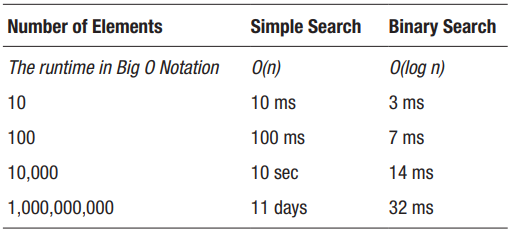

In [3]:
Image(filename='images_projects/image_project_week8_BigONotation.png')

We can clearly see that efficient algorithms can help to improve our programs speed.
Therefore, it’s important to keep efficiency and time complexity in mind when writing
your code.

The following picture depicts the complexity of the number of operations
over the number of elements.

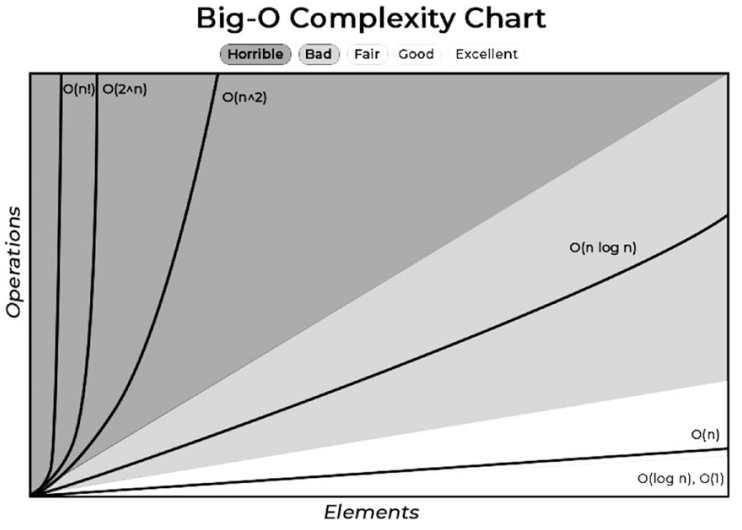

In [4]:
Image(filename='images_projects/image_project_week8_BigONotationComplexity.png')

**Note :** Not all of Big O Notation is covered here, so be sure to do some further research if
you’d like to understand these concepts further. This is simply an introduction into what
Big O is and why it is important when writing our programs.

**Hash Tables**

When we originally covered dictionaries, we went over hashing very briefly. Now that
we’ve covered Big O Notation, understanding hash tables and why they’re important is
much easier. Dictionaries can be accessed in O(1) complexity because of how they are
stored in memory. They use hash tables to store the key-value pairs. Before we cover
hash tables though, let’s have a quick refresher on the hash function and how to use it:

In [5]:
a, c = 'bo', "bob"   
b = a   
print(hash(a), hash(b), hash(c))

420542563232172807 420542563232172807 -8412556723333385093


Hash functions are used to create an integer representation of a
given value. In this case the integer for the string **“bo”** and the variables a and b are the
same; however, **“bob”** and the c variable are completely different because they have a
different value.

When dictionaries store key-value pairs into memory, they use this concept. A hash
table is used to store a hash, a key, and a value. The hash stored is used for when you
need to retrieve a given value by the key. Take the following table, for instance. There are three
key-value pairs in place, all with different hash values. When you want to acces the value
for name, you would write:

In [8]:
person = {'name':'John smith', 'Age': 32, 'language': 'python'}
# Acces the value for name
person[ "name" ]

'John smith'

What happens is Python hashes the string **“name”** and looks for the hash value
rather than the key itself. You can think of this like retrieving an item within a list by its
index. This is much more efficient as you can retrieve values based on hashes almost
instantly at O(1) time.

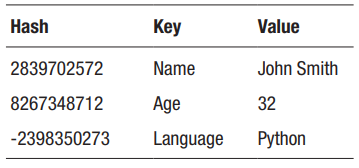

In [10]:
Image(filename='images_projects/image_project_week8_LogicalRepresentationHash.png')

**Note :** **Dictionaries are helpful data collections for not only keeping information connected
but also improving efficiency.** Keep this in mind when you’re trying to answer
programming questions or making a program faster. Like the information on Big O
Notation, this is simply an introduction into hash tables. If you’d like to learn more, be
sure to look it up using Google, Quora, etc.

**Dictionaries vs. Lists**

To understand the true power of a hash table and Python dictionaries, let’s compare it
against a list. 

In [16]:
# creating data collections to test for time complexity
import time
d = {} # generate fake dictionary
for i in range(10000000):
    d[i] = "value"
big_list = [x for x in range(10000000)] # generate fake list

In [17]:
# retriving information and tracking time to see which is faster
start_time = time.time() # tracking time for dictionary
if 9999999 in d:
    print("Found in dictionary")
end_time = time.time() - start_time
print( "Elapsed time for dictionary: {}".format(end_time) )

start_time = time.time() # tracking time for list
if 9999999 in big_list:
    print("Found in list")
end_time = time.time() - start_time
print( "Elapsed time for list: {}".format(end_time))

Found in dictionary
Elapsed time for dictionary: 0.0019741058349609375
Found in list
Elapsed time for list: 0.608661413192749


**Note :** The list
will usually take between 1 and 1.5 seconds, whereas the dictionary is almost instant
every time. Now this doesn’t seem like that big of a difference, but what if you needed
to search for 1000 items. Using a list now becomes a problem, as a dictionary would
continue to do it instantly, but the list would take much longer.

**Battle of the Algorithms**

One of the most obvious ways to test time complexity is to run two algorithms against
each other. This will allow us to really see the power behind an efficient algorithm.
We’re going to test **Bubble Sort** against another sorting algorithm called **Insertion Sort**.

In [24]:
# testing bubble sort vs. insertion sort
def bubbleSort(aList):
    for i in range( len(aList) ):
        switched = False
        for j in range( len(aList) - 1 ):
            if aList[ j ] > aList[ j + 1 ]:
                aList[ j ], aList[ j + 1 ] = aList[ j + 1 ], aList[ j ]
                switched = True
        if switched == False:
            break
    return aList

def insertionSort(aList):
    for i in range( 1, len(aList) ):
        if aList[ i ] < aList[ i - 1 ]:
            for j in range( i, 0, -1 ):
                if aList[ j ] < aList[ j - 1 ]:
                    aList[ j ], aList[ j + 1 ] = aList
                    [ j + 1 ], aList[ j ]
        else:
            break
    return aList

In [26]:
# calling bubble sort and insertino sort to test time complexity
from random import randint
nums = [ randint(0, 100) for x in range(5000) ]
start_time = time.time() # tracking time bubble sort
bubbleSort(nums)
end_time = time.time() - start_time
print( "Elapsed time for Bubble Sort: {}".format(end_time))
start_time = time.time() # tracking time insertion sort
insertionSort(nums)
end_time = time.time() - start_time
print( "Elapsed time for Insertion Sort: {}".format(end_time))

Elapsed time for Bubble Sort: 17.23701286315918
Elapsed time for Insertion Sort: 0.0010225772857666016


**Note :** It’s not even a contest. Insertion Sort is a more efficient
algorithm than its counterpart. Although both use the concept of a double for loop,
Bubble Sort’s steps are much more inefficient because it starts at the front of the list each
time. It’s always important to keep time complexity in mind when designing your program
and algorithms. If you’re ever unsure what’s best to use, try testing it like we have here.

### THURSDAY EXERCISES

Merge Sort is quite fast and has a time complexity of **O(n*log n)**

In [58]:
nums = [x for x in range(10000000)]
num = 9999999 # for find the max number of guesses. We can also use 0
def binarySearch(liste, num):
    condition = False
    nb_guesses = 0
    while liste:
        mid = liste[len(liste)//2]
        nb_guesses += 1
        if num == mid:
            condition = True
            return condition, nb_guesses
        elif num > mid:
            liste = liste[(len(liste)//2)+1:]
        else:
            liste = liste[:(len(liste)//2)]
    
    return condition, nb_guesses

find, number_guesses = binarySearch(nums, num)
print("The number of guesses is : {}".format(number_guesses))
print("Find : {}".format(find))

The number of guesses is : 23
Find : True


# Friday: Interview Prep

If you’re looking for a new career or job as a Python developer, then all these lessons
would be for naught if you can’t pass the interview process. For this Friday, we’re
going to cover the process of a general software development interview. We’ll cover
each stage, what to do before and after the interview, whiteboarding, answering
general and technical questions, and how to contour your resumes and profiles. This
lesson is meant to be helpful for those either struggling on the interview process or
those of you who have never had a formal software development interview.



**Developer Interview Process**   
The interview process for a developer role can be broken down into many different
stages. In the following, you’ll find the main stages that many companies in the
industry practice. Keep in mind that this is a general interview process and not every
company will follow these to a tee. Use this section as more of a guide on what to
possibly expect:   
**• Stage 1**   
– Basic questions about yourself along with past work experience.
The first step will usually be a phone call with a 3rd party recruiter,
internal recruiter, HR, or talent acquisition of the company.
During the first step of the interview process, the interviewer is
trying to gauge if you are the correct fit for the role. They are
looking for you to mention the “Buzzwords” along with providing information on why you are a good fit for the position. You want to
relate yourself to the position. Be sure to talk about your experience using the languages and technologies they’re looking for.
The interviewer is looking for you to meet half of the requirements
to make yourself a good match. No one will ever know everything,
but it is good to show them what you know and your willingness to
learn.   
**Note :** Buzzwords are keywords that the position is looking for. For example, a
back-end position using python would expect to hear words like API, JSON, Python,
Flask, Django, Jinja, Relational Databases, PostgreSQL, etc   

**• Stage 2**   
– If you’ve made it past the phone screen, you’ll usually be asked to
come in for an in-person interview. This stage is generally where
you meet other developers that currently work at the company.
Although they’ll ask you interview questions, this stage is generally
for the employees to see if they would like to work with you and
get to know you on a more personal level. Generally, you’ll interview with small groups of employees at a time. You’ll have about
two to five of these sessions that will last around 10–15 minutes
each. Before hiring an individual, these groups will generally get
together to discuss potential candidates for the next stage. During
this stage, be sure to properly introduce yourself and shake each
person’s hand. Get to know each employee, and try to relate with
them on a personal level.   

***• Stage 3***   
– This is the technical round. In this stage, questions will be asked
to assess the developer’s skills and abilities. Generally, there will
be a whiteboarding question, a couple technical questions on
paper, and a brain teaser. This stage is generally conducted with
the hiring manager, or team manager that you’ll be working with.
When asked a question, make sure you understand it clearly. You
are more than welcome to ask as many questions as you need to clearly understand the problem before answering the question. If
you do not know the answer to the question, let the interviewer
know that you have not worked with that concept or do not see
the problem. The interviewer during this stage will know if you
have no idea what you’re talking about so don’t try and make
something up. They’ll be more impressed with your honesty and
try to guide you through the problem. During this stage, they
don’t care if you’re right or wrong. They’re more interested in how
you think and how well you can problem-solve.   

**• Stage 4**   
– At this point, you’re generally sitting with the hiring manager or
an HR personnel. In this stage, you can ask questions about the
company, as well as the job role. If you’ve made it this far, the
company has seen value in you as a potential employee. Usually,
this is where contract negotiations and salary conversations
occur. At the end of the interview, always have questions ready to
ask and lots of them. If you have no questions, it’s generally a sign
of not being prepared or laziness.



**What to Do Before the Interview**   
In almost everything that you do in life, you can never be too prepared. The same goes
for interviewing. The following are tips for what you should do before your interview:
**• Research**   
– Be sure to research the company you’re interviewing for. Don’t
just understand what products they create, or services they offer,
but know what charities they support, the companies they partner
with, etc. It shows that you’re involved and care about the companies’ well-being. A little goes a long way.
**• Be Prepared**   
– Put together a folder or portfolio of that includes your resume, a
pad of paper for taking notes during the interview, examples of
work, etc.   
**• Resume**   
– Always print on resume on higher quality paper.   
– Contour your resume to the job you’re interviewing for. For
example, for back-end roles, mention Python, SQL, databaserelated technologies, etc.
– Keep your resume to a single page.   
– Don’t add any fluff.   
– Keep it organized with sections like experience, skills, and
education.   
– Think of your resume as a 30-second elevator pitch.   
– Often, it helps to have a designer overlook your resume. Some
sites will do this for a small fee but help to make your resume look
more professional and organized.   
**• Portfolio Web Site**   
– Not all developers have personal web sites, but it certainly looks
bad when you don’t. Imagine going to a dentist that has no teeth.   
View yourself as the product that you’re trying to sell to companies, you should have a web site that shows your skills and allows
others to contact you.   
**• Github**   
– Almost every hiring agency and company will look to your Github
to see the projects you’ve worked on.   
– It’s best to have complete projects on your portfolio as well. One
major project will always stand out better than 10 minor projects.   
– Include your Github account in your resume, portfolio web site,
and e-mails.   
**• LinkedIn**   
– Most recruiters and companies are on LinkedIn for one reason,
and that’s to look for potential candidates for a job posting.   
– Make sure your profile is up to date with all relative information
and projects that you’ve worked on.   
– Your profile picture should be professional. You don’t need to be
in a suit and tie, but it’s best not to have a picture of you on a
beach.    
– Look at this web site as your professional networking service.   
– Post often with information from the field you want to work in.
The more you post, the more apt a recruiter is to recognize you.    
**• Social Media**    
– Make it private or keep it clean. You better believe companies will
look at your posts for a way to understand who you are, and if they
don’t like what they see, you won’t be getting a call back.   
**• Apply Directly**   
– It always looks more professional to send in an application directly
to the company. Often, you’ll find a job you like on Indeed or
ZipRecruiter; however, these companies get flooded with applications every day on these sites, and they generally have algorithms to
eliminate most candidates. Sending a direct e-mail shows that you
put time and effort into directly contacting the company.




**General Questions**    
The following is a list of general nontechnical questions, followed by an example of
a good answer. These questions were selected because they are usually asked and
answered improperly:    
**• What salary are you looking for?**    
– “I don’t have an exact number right now. I’d like to do some more
research on what other companies are offering for a similar
position. What do you pay your employees on average for this
position?”    
– Never state a number when they ask, this provides leverage for
them during any negotiation process.   
– Counter their question with another question.    
– If they continue to ask you for a number, simply state the same
response.   
**• Where do you see yourself in five years?**   
– “I’m more so focused on my skills over the next five years. I know
that focusing on continuing my education and improvement of
myself will lead me to where I need to be.”   
– Focusing on improving your skills shows compassion.   
**• Why did you want to be a software developer?**   
– “I’ve always been intrigued by being able to build something out
of nothing, and I’ve always enjoyed a challenge. When you’re able
to solve problems and build applications, it’s a wonderful feeling.”   
– Show the passion that you have as a developer; it will always
come off as a strength.   
– Never mention it’s about money, even if it is.   
**• Why are you changing careers?**   
– “It felt like I wasn’t being challenged enough in my previous
career and I’ve always been interested in programming and the
thrill that comes with building applications that improve people’s
lives.”   
– Like the previous question, show the passion and drive that you
have for this career.   
– Explaining that you like to be challenged shows your not lazy.
– Never mention it’s about money, even if it is.   
**• Why do you want to work here?**   
– “The applications that you build here help so many users around
the world, and I’d love to be a part of that.”   
– Talk about the applications or charities that the company works
with. It shows that you have passion, work well in teams, and that
your driven.   
– Mentioning the culture of the company would be a great answer
as well.   
– Do not mention salary, benefits, or even worse… have no answer.   
**• Tell me about a tough software problem and how you solved it.**   
– “I was working on a project where I was assigned to implement
the Steam API into the application. Unfortunately, the API
wouldn’t connect properly. Using the debugger, I set break
points at the import and function call locations. After realizing
that they weren’t being hit at all, I figured it must be an issue
with connecting. Having tried several import variations, and
reading through the documentation, I decided to set up the
application to close when the function was hit. When I ran the
program the next time, it closed instantly. Realizing that the
function is being called, but the application isn’t running properly, I figured it had to be an import issue. It wasn’t until I tested
the API in a more up-to-date application that the problem was
due to the code being written in version 2.2, when the API
required version 3.6. In order to connect the API, I had to manually import the library through a mapper function that could
translate the code between versions. After realizing that the
mapper worked, I was able to implement the libraries that the
Steam API included in its SDK.”   
– Go as in depth as you can with the problem. They want to
know every little detail that caused the issue, how you fixed
the problem, and all the ideas you had in trying to solve the
problem. Although the preceding answer may not have made
much sense to you right now, it shows the problem, what I did
to try and find the issue, as well as how I came up with a solution
once I found the problem.   



**Whiteboarding and Technical Questions**  
This section is a list of tips that you should consider using during the third stage of the
interview process for both whiteboarding and technical questions:   
**• Take Your Time**   
– There’s absolutely no rush to solve a problem. Think through a
proper solution first before answering the question. Often, you’ll
think of two or three different solutions given time.   
**• Speak Out Loud**   
– Always talk through your thought process. It makes the interviewer
feel more comfortable so that you’re both not sitting in a quiet
room while you think.   
– It shows the interviewer your ability to problem-solve.   
– Even if you don’t give the correct answer, they can at least
understand where you went wrong and offer some guidance.   
**• Steps > Syntax**   
– When whiteboarding, you’ll need to write out a function or some
lines of code on the board in front of the interviewer. The most
important thing to remember is that your thought process is more
important than your actual code.   
– You can have syntactical bugs on a whiteboard and still pass the
interview; however, having an incorrect algorithm or set of steps
will cause you to fail.   
**• Ask Questions**   
– If you’re unsure, ask questions. It’s perfectly fine to ask questions
when trying to solve a problem.   
– Keep in mind the questions you ask matter though. There’s a big
difference in asking what a sort method does, compared to what
type of sort method would you like me to use.   
**• Algorithmic Complexity**   
– Always keep in mind the complexity of an algorithm. You’ll
generally be asked after you write your code if there is a way to
improve the performance of it even further.   
– Know the Big O Notation category of the algorithm you just wrote.   
– Think about what data types or collections would work best for
your scenario.   
**• Be Honest**    
– If you don’t know an answer, absolutely do not try and talk your
way through it. The interviewer during this stage is a professional
developer and can pick apart anything that doesn’t make sense.   
– Being honest and saying you’re not sure but are willing to learn
the material will always prove to be a better method of answering
questions you don’t know how to solve.   



**End of Interview Questions**   
You never want to be empty handed at the end of an interview when they ask if you have
any questions. It’s usually good practice to take notes during an interview and write
down questions as you think of them. In the following, you’ll find a list of questions that
you should consider asking:    
• How is the commute?   
• Is parking free?   
• Do you hold social events?   
• If I wanted to further my career skills, do you guys offer any services or
tuition reimbursement?   
• What kind of benefits do you offer?   
• What is the company culture like?   
• How many people will be working on the team with me?   
• Will there be mentoring involved?   
• Can you tell me more about the day-to-day responsibilities of this role?   
• What do you like best about working for this company?   
• What is the typical career path within this company for someone in
this role?   
• What are the next steps in the interview process?   
• What might I expect in a typical day?   
• What charities does this company support?   
• Are there any company activities, like sports teams?   




**What to Do After the Interview**   
Even if you pass the first three stages, you can still fail miserably if you don’t execute the
proper steps following the interview. In the following, you’ll find examples of what you
should do once the interview process is complete:   
**• Follow Up**   
– Always, always, always send an e-mail to the interviewer immediately, thanking them for their time. It shows respect and is a
courteous gesture.   
**• Critique Yourself**   
– Understand your own mistakes. Don’t take it personal; the only
way you can get better is by understanding and self-reflecting.   
**• Continue Building**   
– Always be working on projects and trying to improve your
portfolio.   
– Stay up to date with the latest libraries, languages, and
technologies.   
– Update your resume and portfolio often.   
**• Adventure Out**   
– Go out to local networking events in your area. This is where
you’ll meet most of your connections. It’s always easier to land a
job when you know someone who works in the company.   
– Events like code alongs, or hackathons, are a great way to meet
other developers looking to work together.   
**• Rejection**   
– It happens, you won’t always get the job. If it does occur, be sure
to ask the interviewer in a courteous manner as to why you didn’t
get the job. Don’t take it personally; instead use this information
to become a better developer and improve.

### Weekly Challenges

In [59]:
%run our.model.week8.friday.py
# create main fucntion that loops until the user quits
def main():
    done = False
    while not done:
        ans = input("quit/add/remove/show/clear: ").lower()
        # base case
        if ans == "quit":
            print("Thanks for using our program.")
            showCart()
            done = True
        elif ans == "add":
            item = input("What would you like to add ").title()
            addItem(item)
        elif ans == "remove":
            item = input("what would you like to remove").title()
            removeItem(item)
        elif ans == "show":
            showCart()
        elif ans == "clear":
            clearCart()
        else:
            print("Sorry that was not an option")

main() # run the program

Here is your cart:
- 55


In [65]:
%run our.model.week8.friday.py
# create main fucntion that loops until the user quits
def main():
    done = False
    while not done:
        ans = input("quit/add/remove/show/clear/save: ").lower()
        # base case
        if ans == "quit":
            print("Thanks for using our program.")
            showCart()
            done = True
        elif ans == "add":
            item = input("What would you like to add ").title()
            addItem(item)
        elif ans == "remove":
            item = input("what would you like to remove").title()
            removeItem(item)
        elif ans == "show":
            showCart()
        elif ans == "clear":
            clearCart()
        elif ans =="save":
            saveCart()
        else:
            print("Sorry that was not an option")

main() # run the program

Here is your cart:
- 0
- 1
- 1
- 2
